In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2025-11-08 19:57:02.114721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-08 19:57:02.114932: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-08 19:57:02.143360: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-08 19:57:02.748592: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

In [2]:
data = pd.read_csv("data/microsoft-stock-price.csv")
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


* Plot 1 - Open and Close prices of time
* Trading volume

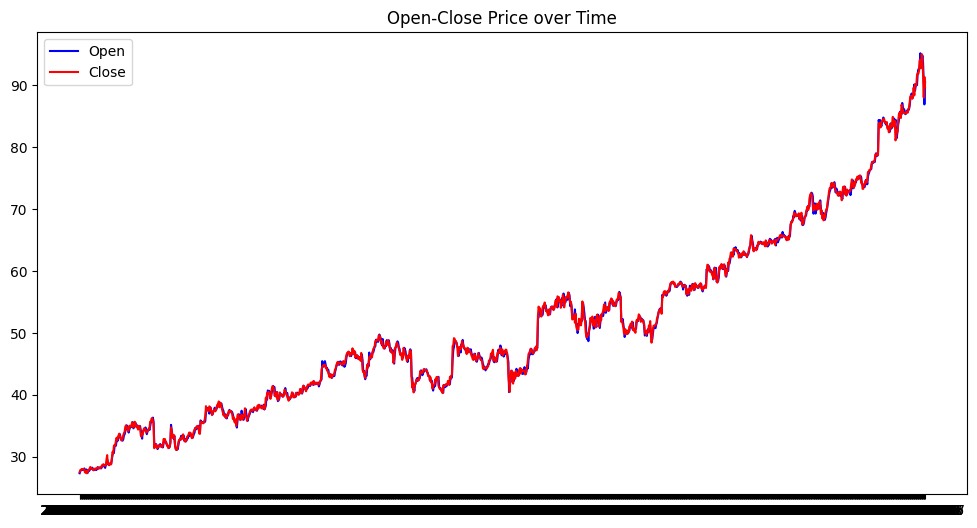

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['open'], label="Open", color="blue")

plt.plot(data['date'], data['close'], label='Close', color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show()

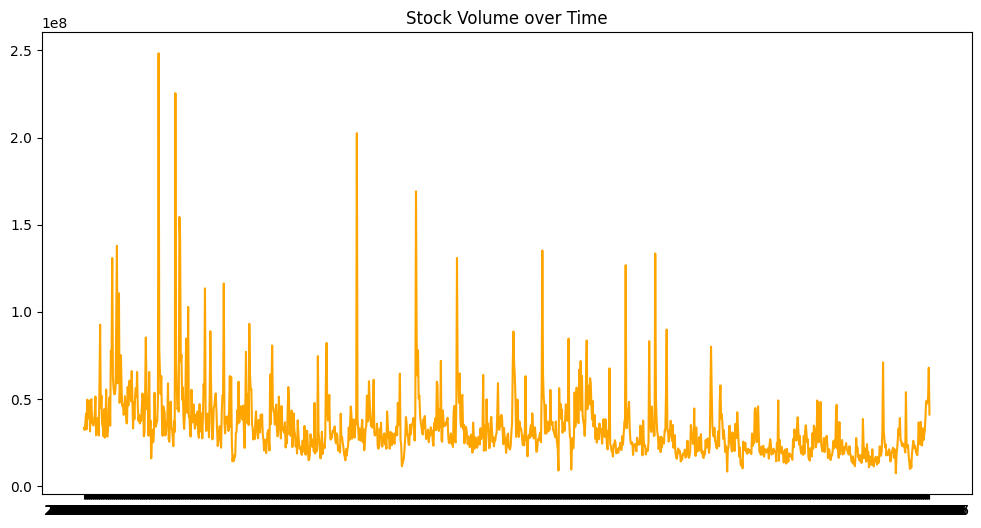

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['volume'],label="Volume", color="orange")
plt.title("Stock Volume over Time")
plt.show()

In [6]:
numeric_data = data.select_dtypes(include=["int64", "float64"])

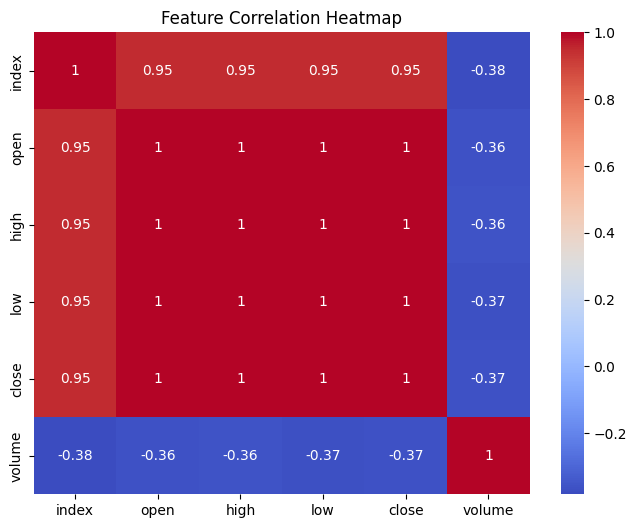

In [7]:

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show() 

* Convert the Date into Date and Time and then create a date filter

In [8]:
data['date'] = pd.to_datetime(data['date'])
prediction = data.loc[
    (data['date'] > datetime(2013,1,1)) &
    (data['date'] < datetime(2018,1,1))
]

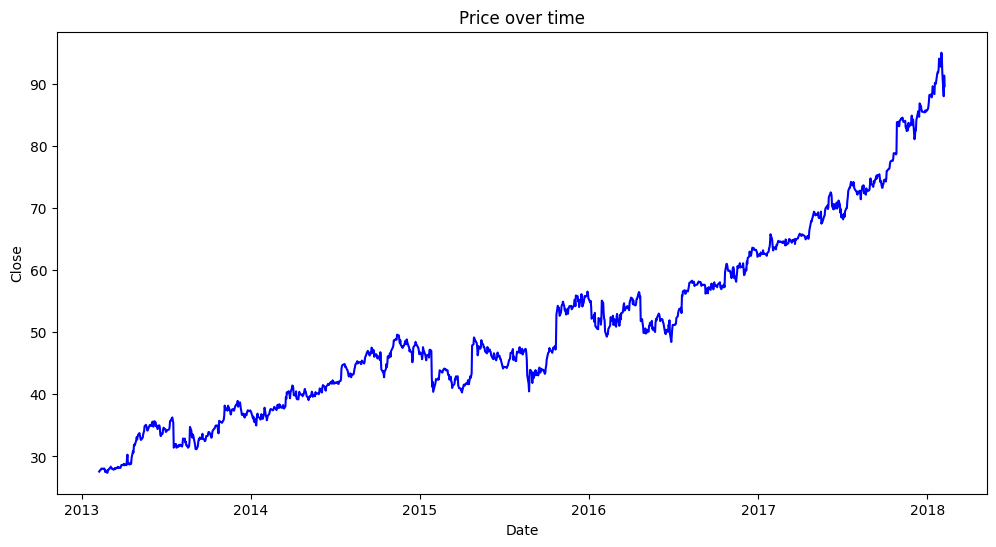

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")
plt.show()

/home/nurzhan/Projects/time-series-forecasting/.env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2188 - root_mean_squared_error: 0.3174
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1288 - root_mean_squared_error: 0.1757
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1142 - root_mean_squared_error: 0.1595
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1172 - root_mean_squared_error: 0.1590
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1161 - root_mean_squared_error: 0.1573
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1131 - root_mean_squared_error: 0.1556
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1067 - root_mean_squared_error: 0.1471
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1098 - root_mean_squared_error: 0.1479
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0973 - root_mean_squared_error: 0.1323
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1025 - root_mean_squared_error: 0.1394
Epoch 11/

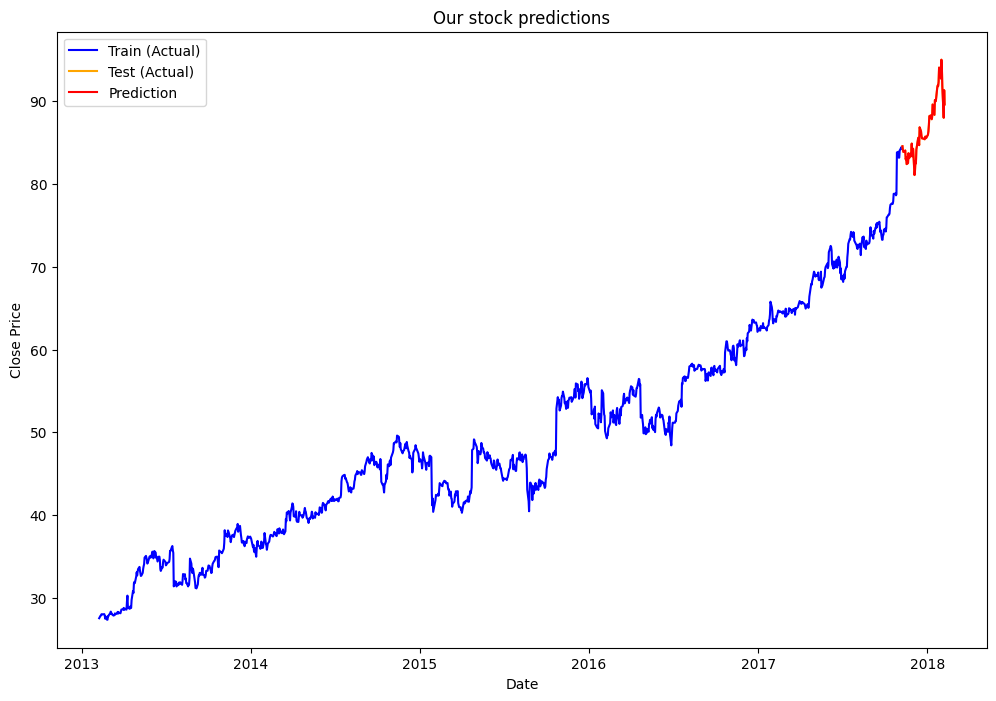

In [12]:
stock_close = data.filter(["close"])

dataset = stock_close.values # convert to numpy array
training_data_length = int(np.ceil(len(dataset) * 0.95))

# Preprocessing Stage
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_length] # 95% of all out data

# Creating our training features
X_train, y_train = [], []


# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build the Model
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))
# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))
# Third Layer
model.add(keras.layers.Dense(128, activation="relu"))
# Fourth Layer
model.add(keras.layers.Dropout(0.5))
# Output layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam", 
                loss="mae",
                metrics=[keras.metrics.RootMeanSquaredError])

training = model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prepare the test data

test_data = scaled_data[training_data_length - 60:]
X_test, y_test = [], dataset[training_data_length:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make a prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


train = data[:training_data_length]
test = data[training_data_length:]

test = test.copy()


test['predictions'] = predictions

plt.figure(figsize=(12, 8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color="blue")
plt.plot(test['date'], test['close'], label="Test (Actual)", color="orange")
plt.plot(test['date'], test['close'], label="Prediction", color="red")
plt.title("Our stock predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()